**uDEVOPS Deliverable 2.2 - use case 2. Causal discovery.**



In [ ]:
!git clone https://github.com/bd2kccd/py-causal.git

**Requirements - INSTALLATION**

In [ ]:
!pip install -U numpy
!pip install -U pandas
!pip install -U javabridge
!pip install -U pydot # optional
!pip install -U GraphViz # optional

**PyCausal installation**

In [ ]:
%cd py-causal
!python setup.py install

**Start using py_causal.**

*Remember to load the dataset file (in the example it is MSA_medians_RT located in the "Use Case 2/dataset" folder on GitHub) under the py-causal/data. folder*

In [ ]:
import pandas as pd
######First, upload data into the py-causal/data folder. Hereafter the data in the "dataset" folder of the GitHub repo (https://github.com/uDEVOPS2020/ContextLearning) is used. #####
data_rca = pd.read_csv('data/MSA_medians_RT.csv')
data_rca = data_rca.iloc[:, 0:10]
print(data_rca)
print(data_rca.describe())

**Start the JVM**

In [ ]:
%cd src 
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

/content/py-causal/src


*Add forbidden or required causal links, if any*

In [ ]:
from pycausal import prior as p
prior = p.knowledge(forbiddirect = [], requiredirect = [], addtemporal = [])

**Load causal algorithms from the py-causal library and Run**

In [ ]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listScores()

**Run the algorithm**

Default is Lingam. Others include FGES, GFCI, RFCI. Uncomment the corresponding lines to run the others, while commenting teh Lingam two lines. 

In [ ]:
#Default algorithm: Lingam
tetrad.getAlgorithmParameters(algoId = 'lingam')
tetrad.run(algoId = 'lingam', dfs = data_rca, numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

#To run other algorithms supported by py-causal library, uncomment the corresponding two lines
#FGES
#tetrad.getAlgorithmParameters(algoId = 'fges', scoreId = 'sem-bic')
#tetrad.run(algoId = 'fges', dfs = data_rca, scoreId = 'sem-bic', priorKnowledge = prior, maxDegree = -1, faithfulnessAssumed = True, symmetricFirstStep = True, numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)
#GFCI
#tetrad.getAlgorithmParameters(algoId = 'gfci', testId = 'fisher-z-test', scoreId = 'sem-bic')
#tetrad.run(algoId = 'gfci', dfs = data_rca, testId = 'fisher-z-test', scoreId = 'sem-bic', priorKnowledge = prior, maxDegree = -1, maxPathLength = -1, completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)
#RFCI
#tetrad.getAlgorithmParameters(algoId = 'rfci', testId = 'fisher-z-test')
#tetrad.run(algoId = 'rfci', dfs = data_rca, testId = 'fisher-z-test', priorKnowledge = prior, depth = -1, maxPathLength = -1, completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True, numberResampling = 5, resamplingEnsemble = 1, addOriginalDataset = True)

**Getting the results in textual form. Node and edges with associated probabilities**

In [ ]:
tetrad.getNodes()
tetrad.getEdges()

The output include probabilities for each arc if "boostrapping" whenever selected in the parameters (numberResaminig>1). In such a case, you can compare the algorithms by the probability by which they assess the edges (see cell above).

**Getting the results in graphical form.**

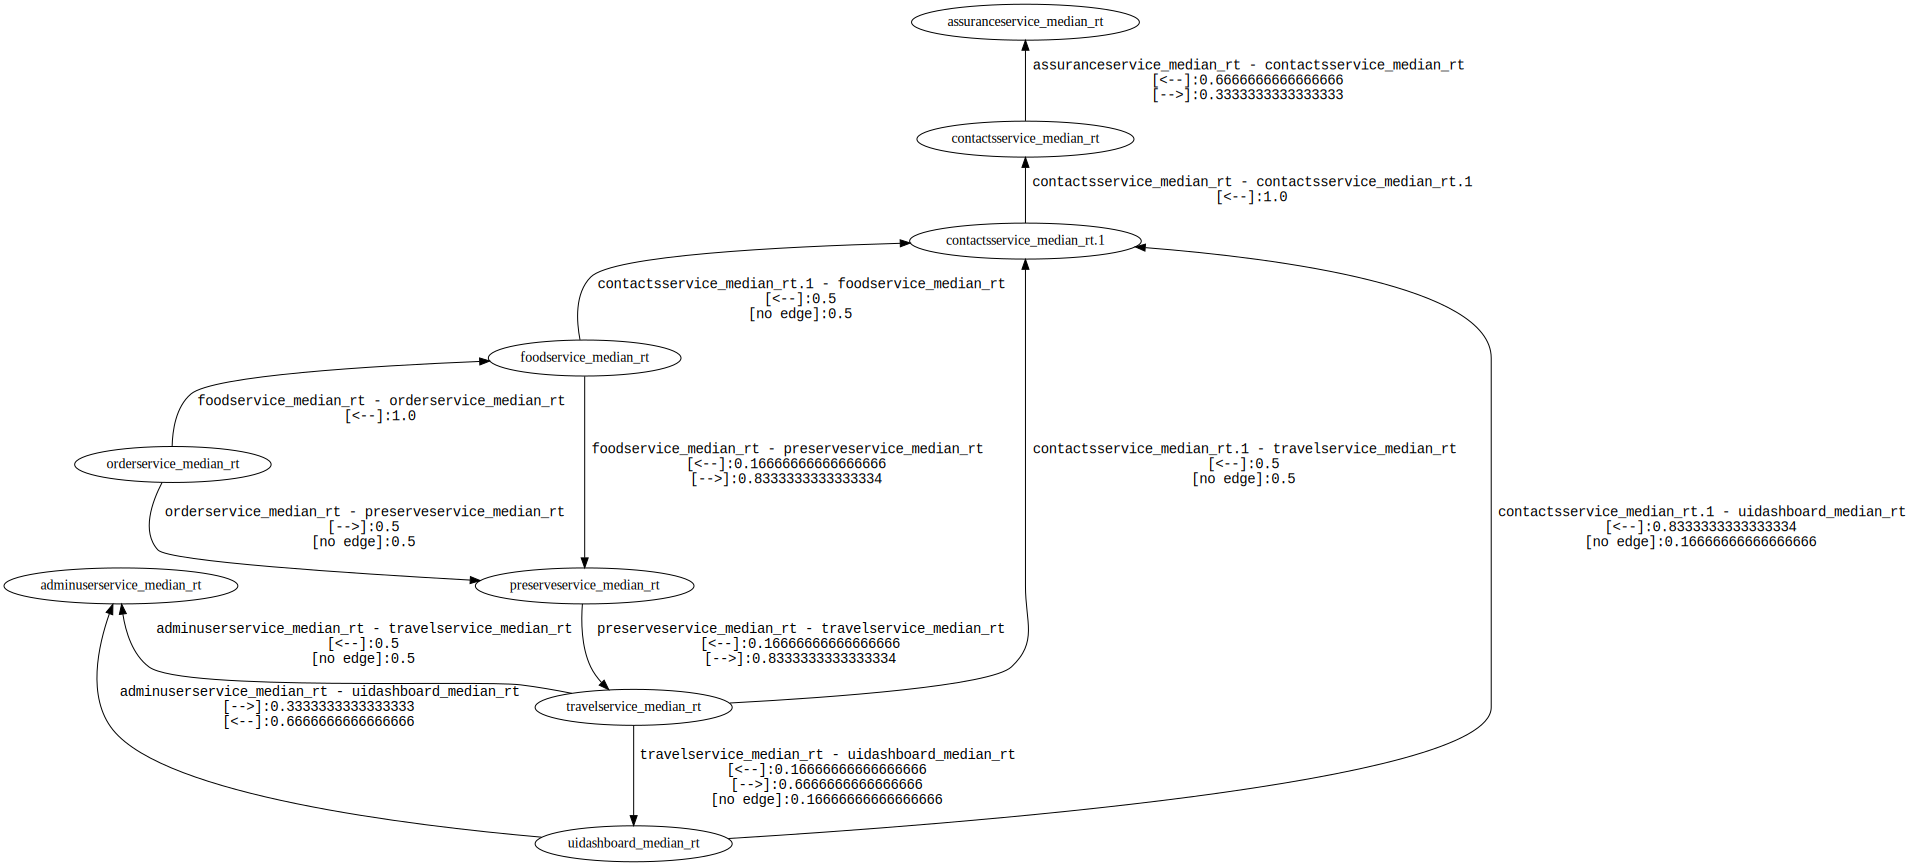

In [ ]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)
#Try also to change the parameters to improve confidence (e.g., increasing bootstrap)

**Stop the JVM**

In [ ]:
pc.stop_vm()